<a href="https://colab.research.google.com/github/pereirarodrigo/fuzzyl/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy logic and inference in computational intelligence
Rodrigo Pereira Cruz <br>
pereirarodrigocs@gmail.com <br>
<br>
***

> This is a Jupyter notebook used for studying fuzzy logic and fuzzy inference in computational intelligence. The focus here is on the theoretical applications of the subjects mentioned previously. Please note that uncertainty is in no way related to probability, given we are dealing with approximate reasoning rather than the chances of some event happening. 

> The Python programming language proved itself to be an interesting choice for this project, given its abudance of libraries and ease of use makes working with fuzzy logic much easier.




## 1. Introduction to fuzzy logic
***
When dealing with uncertain events or missing data, regular mathematical logic (and even predicate logic) will not be useful, given it requires true/false situations in order to be employed as a viable option - this is where fuzzy logic comes in.

Fuzzy logic makes use of crisp (or fuzzy) sets, where each member has a degree of membership such that $0 \leq x \leq 1$ - should the element have a degree of 0, it does not belong in the fuzzy set. We can adapt this idea into a simple example, as shown below in Python:

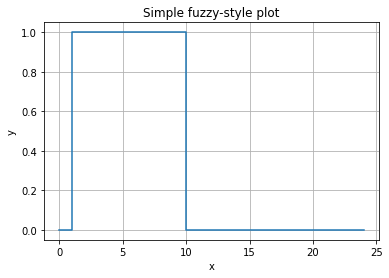

In [16]:
# Simple Python script that creates a fuzzy-like set and plots it

import matplotlib.pyplot as plt
import numpy as np

X = [1 if x >= 2 and x <= 10 else 0 for x in range(25)]

# Optional: converting the list into a NumPy array
X = np.asarray(X)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple fuzzy-style plot")
plt.grid(True, which = "both")
plt.plot(X, drawstyle = "steps-pre")